In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install patchify

In [ ]:
import os

path = "/content/drive/MyDrive/parts_train_data_inter/test_images_labels_targets.tar"
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

/content/drive/MyDrive/best_model_unshared_3_8.keras
/content/drive/MyDrive/no_bg_3ov_dc.keras
/content/drive/MyDrive/chagesw_no_bg_3ov_dc.keras
/content/drive/MyDrive/Copy of Copy of dddmage_class_seg_unshared.ipynb
/content/drive/MyDrive/bulinding_seg_resnet34.keras
/content/drive/MyDrive/teacher_forcing_softloss_dc.keras
/content/drive/MyDrive/ash_k_dmage_classifictaion_per_bulindings.ipynb
/content/drive/MyDrive/dmage_classifictaion_per_bulindings.ipynb
/content/drive/MyDrive/againochange_best_phase2_dcmodel_labelsmoothagum.keras
/content/drive/MyDrive/parts_train_data_inter/test_images_labels_targets.tar
/content/drive/MyDrive/Colab Notebooks/segmentation_model.h5
/content/drive/MyDrive/Colab Notebooks/yt_chatrag.ipynb
/content/drive/MyDrive/Colab Notebooks/dddmage_class_seg_unshared.ipynb
/content/drive/MyDrive/Colab Notebooks/experment_ste_diaster.ipynb
/content/drive/MyDrive/Colab Notebooks/test_data .ipynb
/content/drive/MyDrive/sample_data_150/best_model_unshared.weights.h5
/

In [ ]:
!tar -xf /content/drive/MyDrive/parts_train_data_inter/test_images_labels_targets.tar -C /content/

In [ ]:
import os

extracted_path = '/content/'
for root, dirs, files in os.walk(extracted_path):
    for name in files[:10]:
        print(os.path.join(root, name))
    break


In [ ]:
import os

labels_path = '/content/test/images'

for name in os.listdir(labels_path)[:10]:
    print(name)


socal-fire_00001266_pre_disaster.png
hurricane-florence_00000141_pre_disaster.png
hurricane-matthew_00000273_pre_disaster.png
hurricane-harvey_00000415_post_disaster.png
midwest-flooding_00000112_pre_disaster.png
hurricane-matthew_00000257_pre_disaster.png
hurricane-michael_00000116_post_disaster.png
midwest-flooding_00000160_pre_disaster.png
socal-fire_00000214_post_disaster.png
hurricane-harvey_00000150_pre_disaster.png


In [ ]:
import os
import glob

image_dir = '/content/test/images'
target_dir = '/content/test/targets'
label_dir = '/content/test/labels'

train_dict = {}

# Loop through target masks
for target_path in glob.glob(os.path.join(target_dir, '*_target.png')):
    filename = os.path.basename(target_path)

    # Remove _pre_disaster_target.png or _post_disaster_target.png
    if '_pre_disaster_target.png' in filename:
        base_id = filename.replace('_pre_disaster_target.png', '')
    elif '_post_disaster_target.png' in filename:
        base_id = filename.replace('_post_disaster_target.png', '')
    else:
        continue  # skip invalid names

    pre_img = os.path.join(image_dir, base_id + '_pre_disaster.png')
    post_img = os.path.join(image_dir, base_id + '_post_disaster.png')
    label_json = os.path.join(label_dir, base_id + '_post_disaster.json')

    if os.path.exists(pre_img) and os.path.exists(post_img):
        train_dict[base_id] = {
            'pre_image': pre_img,
            'post_image': post_img,
            'target_mask': target_path,
            'label_json': label_json if os.path.exists(label_json) else None
        }
    else:
        print(f"Missing: {base_id}")
        if not os.path.exists(pre_img):
            print(" - Missing pre:", pre_img)
        if not os.path.exists(post_img):
            print(" - Missing post:", post_img)

# Preview one example
from pprint import pprint
pprint(dict(list(train_dict.items())[:1]))


{'hurricane-harvey_00000162': {'label_json': '/content/test/labels/hurricane-harvey_00000162_post_disaster.json',
                               'post_image': '/content/test/images/hurricane-harvey_00000162_post_disaster.png',
                               'pre_image': '/content/test/images/hurricane-harvey_00000162_pre_disaster.png',
                               'target_mask': '/content/test/targets/hurricane-harvey_00000162_pre_disaster_target.png'}}


In [ ]:
len(train_dict)

933

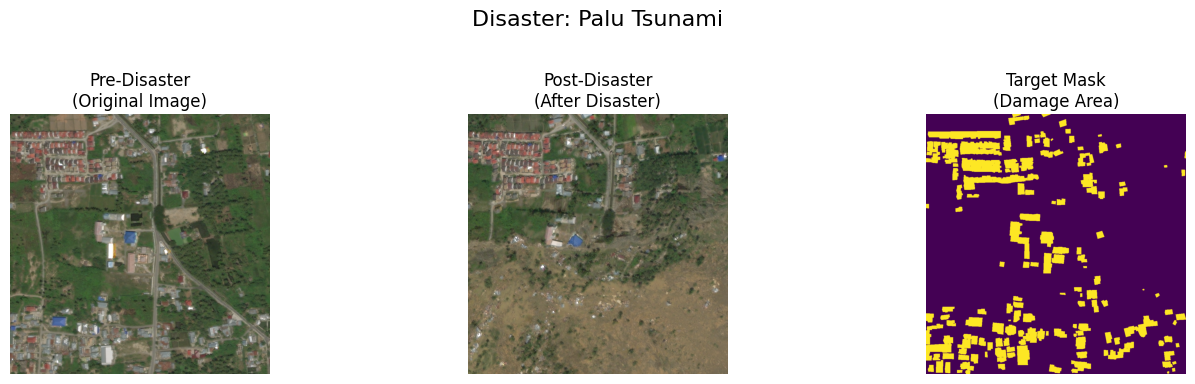

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def visualize_sample(sample_id, entry):
    disaster_name = sample_id.split('_')[0]

    pre = Image.open(entry["pre_image"])
    post = Image.open(entry["post_image"])
    target = Image.open(entry["target_mask"])

    plt.figure(figsize=(14, 4))
    plt.suptitle(f"Disaster: {disaster_name.replace('-', ' ').title()}", fontsize=16)

    # Pre-Disaster Image
    plt.subplot(1, 3, 1)
    plt.imshow(pre)
    plt.title("Pre-Disaster\n(Original Image)", fontsize=12)
    plt.axis('off')
    plt.xlabel("Date: [Insert date if applicable]", fontsize=10)  # Label for pre-disaster

    # Post-Disaster Image
    plt.subplot(1, 3, 2)
    plt.imshow(post)
    plt.title("Post-Disaster\n(After Disaster)", fontsize=12)
    plt.axis('off')
    plt.xlabel("Location: [Insert location if applicable]", fontsize=10)  # Label for post-disaster

    # Target Mask
    plt.subplot(1, 3, 3)
    plt.imshow(target)
    plt.title("Target Mask\n(Damage Area)", fontsize=12)
    plt.axis('off')
    plt.xlabel("Area Affected: [Insert details if applicable]", fontsize=10)  # Label for target mask

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage
first_key = list(train_dict.keys())[83]
visualize_sample(first_key, train_dict[first_key])


In [ ]:
# Example: find key at index 809
index_to_find = 83

# Get the list of keys
keys_list = list(train_dict.keys())

if index_to_find < len(keys_list):
    key_at_index = keys_list[index_to_find]
    print(f"Key at index {index_to_find}:", key_at_index)

    # Disaster name is usually the first part before underscore
    disaster_name = key_at_index.split('_')[0]  # e.g. "hurricane-harvey"
    print("Disaster name:", disaster_name)
else:
    print("Index out of range")


Key at index 83: palu-tsunami_00000165
Disaster name: palu-tsunami


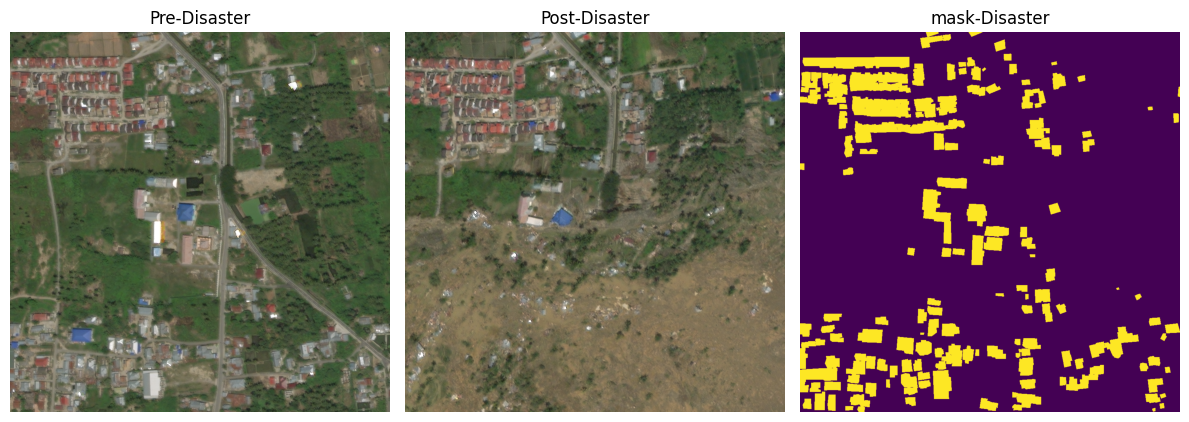

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define the path to the images
root = '/content/test/images'  # Adjust this path according to your directory

# Specify the paths to the pre- and post-disaster images for "vovveco"
pre_path = os.path.join(root, 'palu-tsunami_00000165_pre_disaster.png')  # Replace with actual filenames
post_path = os.path.join(root, 'palu-tsunami_00000165_post_disaster.png')
#target=os.path.join(root,'santa-rosa-wildfire_00000052_pre_disaster_target.png')
target='/content/test/targets/palu-tsunami_00000165_pre_disaster_target.png'
 # Replace with actual filenames

# Read the images
pre_img = Image.open(pre_path)
post_img = Image.open(post_path)
taregt_img=Image.open(target)

# Display the images side by side
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.subplot(1, 3, 1)
plt.imshow(pre_img)
plt.title("Pre-Disaster")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(post_img)
plt.title("Post-Disaster")
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(taregt_img)
plt.title("mask-Disaster")
plt.axis('off')


plt.tight_layout()  # Ensure the images don't overlap
plt.show()


# genralization


In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf

# Load your best model (includes segmentation + classification outputs)
# model_path = '/content/drive/MyDrive/best_model_unshared_3_8.keras'
# # model_path = '/content/drive/MyDrive/bulinding_seg_resnet34.keras'

# model = load_model(model_path, compile=False)  #


@tf.keras.utils.register_keras_serializable(package="Custom")
def bulinding_iou(y_true, y_pred):
    y_pred = tf.cast(y_pred > 0.5, tf.float32)

    # Only keep patches that have some damage
    mask = tf.reduce_sum(y_true, axis=[1,2,3]) > 0
    y_true = tf.boolean_mask(y_true, mask)
    y_pred = tf.boolean_mask(y_pred, mask)

    # If no damage patches exist, return 0
    def compute_iou():
        intersection = tf.reduce_sum(y_true * y_pred, axis=[1,2,3])
        union = tf.reduce_sum(y_true, axis=[1,2,3]) + tf.reduce_sum(y_pred, axis=[1,2,3]) - intersection
        return tf.reduce_mean(intersection / (union + 1e-7))

    return tf.cond(tf.size(y_true) > 0, compute_iou, lambda: 0.0)

@tf.keras.utils.register_keras_serializable(package="Custom")
def bulinding_f1_per_class(y_true, y_pred):
    y_pred = tf.cast(y_pred > 0.5, tf.float32)

    # Only damage class
    intersection = tf.reduce_sum(y_true * y_pred)
    precision = intersection / (tf.reduce_sum(y_pred) + 1e-7)
    recall = intersection / (tf.reduce_sum(y_true) + 1e-7)
    return 2 * precision * recall / (precision + recall + 1e-7)
model = load_model(
    "/content/drive/MyDrive/bulinding_seg_resnet34.keras",
    custom_objects={
        "bulinding_iou": bulinding_iou,
        "bulinding_f1_per_class": bulinding_f1_per_class
    },
    compile=False  # safer for custom losses
)

 # for only one input

In [ ]:
from PIL import Image
import numpy as np
from patchify import patchify, unpatchify

patch_size = 256

# ------------------- Load image -------------------
def load_image(path):
    return np.array(Image.open(path).convert("RGB"))

# ------------------- Patchify -------------------
def patchify_image(image, patch_size=256):
    """
    Patchify an image into (n_h, n_w, patch_size, patch_size, 3)
    """
    patches = patchify(image, (patch_size, patch_size, 3), step=patch_size)
    patches = patches[:, :, 0, :, :, :]  # remove extra dimension
    print(f"[DEBUG] patchify_image -> patches.shape: {patches.shape}")
    return patches

# ------------------- Reconstruct mask -------------------
def reconstruct_mask_from_patches(patches, image_shape, patch_size=256):
    """
    Reconstruct single-channel mask safely using 2D unpatchify
    """
    H, W = image_shape[:2]
    print(f"[DEBUG] Reconstructing -> patches.shape before squeeze: {patches.shape}")

    # Squeeze the single-channel dimension for 2D unpatchify
    patches_2d = patches.squeeze(-1)  # (n_h, n_w, patch_h, patch_w)
    print(f"[DEBUG] After squeeze -> patches_2d.shape: {patches_2d.shape}")

    # Reconstruct 2D mask
    full_mask_2d = unpatchify(patches_2d, (H, W))
    print(f"[DEBUG] full_mask_2d.shape: {full_mask_2d.shape}")

    # Add channel back for consistency
    full_mask = np.expand_dims(full_mask_2d, axis=-1)
    return full_mask

# ------------------- Prediction Loop -------------------
test_images = dict(list(train_dict.items())[10:20])  # take first 10 for testing
predicted_masks = []

for img_id, info in test_images.items():
    print(f"[DEBUG] Processing Image ID: {img_id}")
    img_pre = load_image(info['pre_image'])
    print(f"[DEBUG] Original pre image shape: {img_pre.shape}")

    # Patchify pre image
    pre_patches = patchify_image(img_pre, patch_size) / 255.0

    # Flatten for model input
    flat_pre = pre_patches.reshape(-1, patch_size, patch_size, 3)

    # Predict segmentation
    seg_preds_flat = model.predict(flat_pre, batch_size=8)
    if isinstance(seg_preds_flat, list):
        seg_preds_flat = seg_preds_flat[0]

    print(f"[DEBUG] Prediction output type: {type(seg_preds_flat)}, shape: {seg_preds_flat.shape}")

    # Ensure single-channel
    if seg_preds_flat.shape[-1] != 1:
        seg_preds_flat = np.expand_dims(seg_preds_flat[..., 0], axis=-1)

    # Reshape back to 2D grid (n_h, n_w, patch_h, patch_w, 1)
    n_h, n_w = pre_patches.shape[:2]
    seg_preds_grid = seg_preds_flat.reshape(n_h, n_w, patch_size, patch_size, 1)

    # Reconstruct full mask safely
    full_mask = reconstruct_mask_from_patches(seg_preds_grid, img_pre.shape, patch_size)

    # Binary mask
    binary_mask = (full_mask > 0.5).astype(np.uint8)

    # Overlay for visualization
    overlay = img_pre.copy()
    mask_2d = binary_mask.squeeze(-1).astype(bool)
    overlay[mask_2d] = [255, 0, 0]

    predicted_masks.append((img_id, binary_mask, overlay))

print("✅ Predictions done for 10 pre images!")


[DEBUG] Processing Image ID: socal-fire_00000208
[DEBUG] Original pre image shape: (1024, 1024, 3)
[DEBUG] patchify_image -> patches.shape: (4, 4, 256, 256, 3)
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step
[DEBUG] Prediction output type: <class 'numpy.ndarray'>, shape: (16, 256, 256, 1)
[DEBUG] Reconstructing -> patches.shape before squeeze: (4, 4, 256, 256, 1)
[DEBUG] After squeeze -> patches_2d.shape: (4, 4, 256, 256)
[DEBUG] full_mask_2d.shape: (1024, 1024)
[DEBUG] Processing Image ID: santa-rosa-wildfire_00000206
[DEBUG] Original pre image shape: (1024, 1024, 3)
[DEBUG] patchify_image -> patches.shape: (4, 4, 256, 256, 3)
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step
[DEBUG] Prediction output type: <class 'numpy.ndarray'>, shape: (16, 256, 256, 1)
[DEBUG] Reconstructing -> patches.shape before squeeze: (4, 4, 256, 256, 1)
[DEBUG] After squeeze -> patches_2d.shape: (4, 4, 256, 256)
[DEBUG] full_mask_2d.shape: (1024, 1024)
[DEBUG] Processing Image ID: socal-fire_00001046
[DEBUG] Original pre image shape

In [ ]:
import matplotlib.pyplot as plt

# Function to display results for pre-image only
def display_results_pre(img_id, info, binary_mask, overlay, target_mask):
    img_pre = load_image(info['pre_image'])
    gt_mask = np.array(Image.open(info['target_mask'])) if 'target_mask' in info else target_mask

    plt.figure(figsize=(12, 4))

    # Pre-disaster image
    plt.subplot(1, 3, 1)
    plt.imshow(img_pre)
    plt.title("Pre-Disaster Image")
    plt.axis("off")

    # Ground truth mask
    plt.subplot(1, 3, 2)
    plt.imshow(gt_mask, cmap="gray")
    plt.title("Ground Truth Mask")
    plt.axis("off")

    # Predicted overlay
    plt.subplot(1, 3, 3)
    plt.imshow(overlay)
    plt.title("Predicted Overlay")
    plt.axis("off")

    plt.suptitle(f"Prediction Results: {img_id}", fontsize=14)
    plt.tight_layout()
    plt.show()


# ------------------- Visualize a few predictions -------------------
for idx, (img_id, binary_mask, overlay) in enumerate(predicted_masks[:10]):  # first 10 predictions
    info = test_images[img_id]
    gt_mask = load_image(info['target_mask']) if 'target_mask' in info else binary_mask  # fallback if no GT
    display_results_pre(img_id, info, binary_mask, overlay, gt_mask)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
 !pip install git+https://github.com/qubvel/segmentation_models.git

  Cloning https://github.com/qubvel/segmentation_models.git to /tmp/pip-req-build-vxsd1s8i
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.git /tmp/pip-req-build-vxsd1s8i
  Resolved https://github.com/qubvel/segmentation_models.git to commit 5d24bbfb28af6134e25e2c0b79e7727f6c0491d0
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.1 MB/s eta 0:00:00
  Created wheel for segmentation_models: filename=segmentation_models-1.0.1-py3-none-any.whl size=33789 sha256=c0ce639300ae0840c2fd0cbf36cad149b68e585f7b23455bbace7ddf6698facb
  Stored in directory: /tmp/pip-ephem-wheel-cache-uv592ude/wheels/9b/47/21/97c825c6fe2c32a67ca224b409ff1511159ca3b15ee2f868fb
Successfully built segmentation_models


In [ ]:
def binarize_mask(mask):
    """
    Convert mask to binary: building >0, background=0
    """
    mask_bin = (mask > 0).astype(np.uint8)
    return mask_bin




building_images = []
background_images = []

for img_id, info in train_dict.items():
    gt_mask = np.array(Image.open(info['target_mask'])).astype(np.uint8)
    gt_bin = binarize_mask(gt_mask)

    if np.sum(gt_bin) > 0:  # contains building pixels
        building_images.append(img_id)
    else:  # all background
        background_images.append(img_id)

# Keep 80% building images
n_building = int(len(building_images) * 0.8)
selected_building = building_images[:n_building]

# Keep 20% background images
n_background = int(len(background_images) * 0.2)
selected_background = background_images[:n_background]

# Final filtered list
selected_images = selected_building + selected_background
print(f"Selected images: {len(selected_images)}")


Selected images: 633


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
from patchify import patchify, unpatchify
import segmentation_models as sm

# --------------------- Setup metrics ---------------------
sm.set_framework('tf.keras')
sm.framework()

# Built-in SM metrics
iou_metric = sm.metrics.IOUScore()
f1_metric = sm.metrics.FScore()

@tf.keras.utils.register_keras_serializable(package="Custom")
def bulinding_iou(y_true, y_pred):
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    mask = tf.reduce_sum(y_true, axis=[1,2,3]) > 0
    y_true = tf.boolean_mask(y_true, mask)
    y_pred = tf.boolean_mask(y_pred, mask)

    def compute_iou():
        intersection = tf.reduce_sum(y_true * y_pred, axis=[1,2,3])
        union = tf.reduce_sum(y_true, axis=[1,2,3]) + tf.reduce_sum(y_pred, axis=[1,2,3]) - intersection
        return tf.reduce_mean(intersection / (union + 1e-7))

    return tf.cond(tf.size(y_true) > 0, compute_iou, lambda: tf.constant(0.0))

@tf.keras.utils.register_keras_serializable(package="Custom")
def bulinding_f1_per_class(y_true, y_pred):
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred)
    precision = intersection / (tf.reduce_sum(y_pred) + 1e-7)
    recall = intersection / (tf.reduce_sum(y_true) + 1e-7)
    f1 = 2 * precision * recall / (precision + recall + 1e-7)
    return tf.constant(f1)

# --------------------- Function to binarize masks ---------------------
def binarize_mask(mask):
    """
    Convert mask to binary: 1 for building (or damage), 0 for background.
    """
    bin_mask = np.where(mask > 0, 1.0, 0.0).astype(np.float32)
    return bin_mask

# --------------------- Metrics computation ---------------------
metric_results = []

# Select first 60 images from your pre-selected list
subset_images = selected_images[:60]

for img_id in subset_images:
    info = train_dict[img_id]

    # --- 1️ Load pre-disaster image and normalize ---
    img_pre = np.array(Image.open(info['pre_image']).convert("RGB")).astype(np.float32) / 255.0

    # --- 1a️⃣ Pad image to multiples of 256 (prevents unpatchify issues) ---
    h, w = img_pre.shape[:2]
    pad_h = (256 - h % 256) % 256
    pad_w = (256 - w % 256) % 256
    img_pre_padded = np.pad(img_pre, ((0, pad_h), (0, pad_w), (0,0)), mode='reflect')

    # --- 2️ Patchify image into 256x256 with 50% overlap ---
    step = 128  # 50% overlap
    patches = patchify(img_pre_padded, (256, 256, 3), step=step)
    patches = patches[:, :, 0, :, :, :]  # remove extra dimension
    n_h, n_w = patches.shape[:2]
    flat_patches = patches.reshape(-1, 256, 256, 3)

    # --- 3️ Predict on patches ---
    preds_flat = model.predict(flat_patches, batch_size=8)
    if preds_flat.shape[-1] != 1:
        preds_flat = np.expand_dims(preds_flat[..., 0], axis=-1)

    # --- 4️ Reconstruct full mask with averaging overlapping tiles ---
    prob_map = np.zeros((img_pre_padded.shape[0], img_pre_padded.shape[1]), dtype=np.float32)
    weight_map = np.zeros_like(prob_map)

    gx = np.linspace(-1,1,256)
    gw = np.exp(-0.5*(gx**2)/0.25**2)
    gw2d = np.outer(gw, gw)

    idx = 0
    for i in range(n_h):
        for j in range(n_w):
            y0 = i * step
            x0 = j * step
            y1 = y0 + 256
            x1 = x0 + 256
            tile_prob = preds_flat[idx,...,0]
            prob_map[y0:y1, x0:x1] += tile_prob * gw2d
            weight_map[y0:y1, x0:x1] += gw2d
            idx += 1

    weight_map[weight_map == 0] = 1.0
    y_pred_full = (prob_map / weight_map)[:h, :w]  # crop to original image size

    # --- 4b️⃣ Threshold after reconstruction ---
    y_pred_full = (y_pred_full > 0.5).astype(np.float32)[..., np.newaxis]

    # --- 5️ Load ground truth mask ---
    y_true = np.array(Image.open(info['target_mask'])).astype(np.float32)
    y_true = binarize_mask(y_true)
    y_true = y_true[..., np.newaxis]

    # --- 6️ Convert to tensors for TF metrics ---
    y_true_tf = tf.cast(tf.expand_dims(y_true, axis=0), tf.float32)
    y_pred_tf = tf.cast(tf.expand_dims(y_pred_full, axis=0), tf.float32)

    # --- 7️ Compute metrics ---
    iou = float(iou_metric(y_true_tf, y_pred_tf).numpy())
    f1 = float(f1_metric(y_true_tf, y_pred_tf).numpy())
    iou_custom = float(bulinding_iou(y_true_tf, y_pred_tf))
    f1_custom = float(bulinding_f1_per_class(y_true_tf, y_pred_tf))

    # --- 8️ Store results ---
    metric_results.append({
        "img_id": img_id,
        "iou": iou,
        "f1": f1,
        "iou_custom": iou_custom,
        "f1_custom": f1_custom
    })

# --- 9️ Create DataFrame and compute average metrics ---
df_metrics = pd.DataFrame(metric_results)
for col in ["iou", "f1", "iou_custom", "f1_custom"]:
    df_metrics[col] = df_metrics[col].astype(np.float32)

print("Per-image metrics:")
print(df_metrics)

avg_metrics = df_metrics[["iou", "f1", "iou_custom", "f1_custom"]].mean()
print("\nAverage metrics over 60 selected images:")
print(avg_metrics)


Segmentation Models: using `keras` framework.
7/7 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 